In [106]:
import cv2
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import defaultdict as dd

## 1. Regular SIFT

In [ ]:
# 1.1 Algorithm

In [12]:
train_path = 'Assignment06_data\Assignment06_data_reduced\TrainingDataset'
bfly_train_path = train_path + r'\024.butterfly'
cbhat_train_path = train_path + r'\051.cowboy-hat'
plane_train_path = train_path + r'\251.airplanes'

In [45]:
%%time
# find SIFT features for reduced data training set
# hold in a dict where the name of the category maps to a list of 
# (keypoint, feature descriptor) tuples
# train_sifts = {'bfly':[], 'cbhat':[], 'plane':[]}
# train_sifts = {}
# train_sifts = pd.DataFrame(columns = ['keypoint', 'descriptor', 'category'])

# create list of features where each item is an mxn matrix
# m = number of features extracted from given image
# n = 128, number of histogram values describing feature using SIFT
train_sifts = []
sift = cv2.xfeatures2d.SIFT_create()
for file in sorted(os.listdir(bfly_train_path)):
    imgPath = os.path.join(bfly_train_path, file)
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray,None)
    feature = (des, 1)
    train_sifts.append(feature)
#     train_sifts['bfly'].append((kp, des))
for file in sorted(os.listdir(cbhat_train_path)):
    imgPath = os.path.join(cbhat_train_path, file)
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray,None)
    feature = (des, 2)
    train_sifts.append(feature)
#     train_sifts['cbhat'].append((kp, des))
for file in sorted(os.listdir(plane_train_path)):
    imgPath = os.path.join(plane_train_path, file)
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray,None)
    feature = (des, 3)
    train_sifts.append(feature)
#     train_sifts['plane'].append((kp, des))

Wall time: 12.2 s


In [56]:
# extract and stack features for input into kmeans clustering
# (num data points) x (num features)
# num data points = total features extracted from images (non-unique)
# num features = 128 hist bin values representing 16x16 nbrhood around a point, make up feature
train_feats = []
for pair in train_sifts:
    train_feats.append(pair[0])
train_stack = np.array(train_feats[0])
for others in train_feats[1:]:
    train_stack = np.vstack((train_stack, others))

In [52]:
print(train_stack.shape)

(140957, 128)


In [54]:
print(np.array(train_feats[0]).shape)

(381, 128)


In [59]:
# cluster features
kmeans = KMeans(n_clusters = 1000)
pred_y = kmeans.fit_predict(train_stack)

In [77]:
# list (np.array) of integers where each number is the number of the associated cluster for the
# feature at the same index in the list of 
labels = kmeans.labels_

In [81]:
len(labels)

140957

In [103]:
classes = []
for img in train_sifts:
    for feat in img[0]:
        classes.append(img[1])

In [104]:
print(len(classes))

140957


In [107]:
hists = {'bfly':dd(int), 'cbhat':dd(int), 'plane':dd(int)}
n_feats = range(len(labels))
for i in n_feats:
    cluster = labels[i]
    if classes[i] == 1:
        hists['bfly'][cluster] += 1
    elif classes[i] == 2:
        hists['cbhat'][cluster] += 1
    elif classes[i] == 3:
        hists['plane'][cluster] += 1

<BarContainer object of 1001 artists>

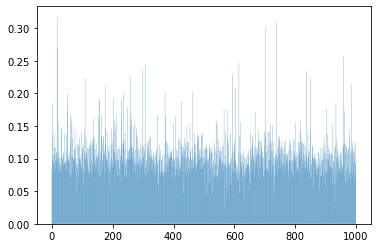

In [174]:
# butterfly features
keys1 = []
vals1 = []
for key in hists['bfly'].keys():
    keys1.append(key)
    val = hists['bfly'][key] / len(hists['bfly'].keys())
    vals1.append(val)
plt.bar(keys1, vals1, snap=False)

<BarContainer object of 1001 artists>

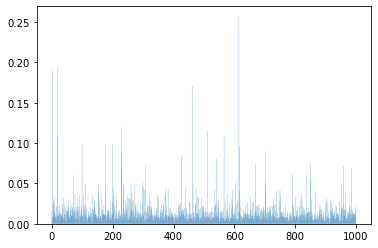

In [178]:
# cowboy hat features
keys2 = []
vals2 = []
for key in hists['cbhat'].keys():
    keys2.append(key)
    val = hists['cbhat'][key] / len(hists['cbhat'].keys())
    vals2.append(val)
plt.bar(keys2, vals2, snap=False)

<BarContainer object of 1001 artists>

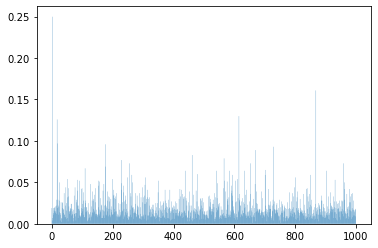

In [179]:
# airplane features
keys3 = []
vals3 = []
for key in hists['plane'].keys():
    keys3.append(key)
    val = hists['plane'][key] / len(hists['plane'].keys())
    vals3.append(val)
plt.bar(keys3, vals3, snap=False)

In [180]:
## Testing

In [181]:
test_path = 'Assignment06_data\Assignment06_data_reduced'
bfly_test_path = test_path + r'\TestDataset_2'
cbhat_test_path = test_path + r'\TestDataset_1'
plane_test_path = test_path + r'\TestDataset_3'

In [182]:
%%time
test_sifts = []
sift = cv2.xfeatures2d.SIFT_create()
for file in sorted(os.listdir(bfly_test_path)):
    imgPath = os.path.join(bfly_test_path, file)
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray,None)
    feature = (des, 1)
    test_sifts.append(feature)
for file in sorted(os.listdir(cbhat_test_path)):
    imgPath = os.path.join(cbhat_test_path, file)
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray,None)
    feature = (des, 2)
    test_sifts.append(feature)
for file in sorted(os.listdir(plane_test_path)):
    imgPath = os.path.join(plane_test_path, file)
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray,None)
    feature = (des, 3)
    test_sifts.append(feature)

Wall time: 3.39 s


In [183]:
test_feats = []
for pair in test_sifts:
    test_feats.append(pair[0])
test_stack = np.array(test_feats[0])
for others in test_feats[1:]:
    test_stack = np.vstack((test_stack, others))

In [186]:
%%time
test_kmeans = KMeans(n_clusters = 1000)
test_pred_y = test_kmeans.fit_predict(test_stack)

Wall time: 7min 48s


In [187]:
test_labels = test_kmeans.labels_
test_classes = []
for img in test_sifts:
    for feat in img[0]:
        test_classes.append(img[1])

test_hists = {'bfly':dd(int), 'cbhat':dd(int), 'plane':dd(int)}
test_n_feats = range(len(test_labels))
for i in test_n_feats:
    cluster = test_labels[i]
    if test_classes[i] == 1:
        test_hists['bfly'][cluster] += 1
    elif test_classes[i] == 2:
        test_hists['cbhat'][cluster] += 1
    elif test_classes[i] == 3:
        test_hists['plane'][cluster] += 1

<BarContainer object of 997 artists>

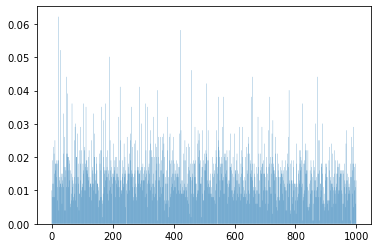

In [188]:
# butterfly features
test_keys1 = []
test_vals1 = []
for key in test_hists['bfly'].keys():
    test_keys1.append(key)
    val = test_hists['bfly'][key] / len(test_hists['bfly'].keys())
    test_vals1.append(val)
plt.bar(test_keys1, test_vals1, snap=False)

<BarContainer object of 848 artists>

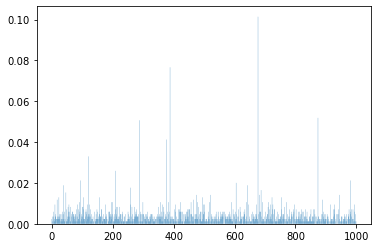

In [189]:
# cowboy hat features
test_keys2 = []
test_vals2 = []
for key in test_hists['cbhat'].keys():
    test_keys2.append(key)
    val = test_hists['cbhat'][key] / len(test_hists['cbhat'].keys())
    test_vals2.append(val)
plt.bar(test_keys2, test_vals2, snap=False)

<BarContainer object of 928 artists>

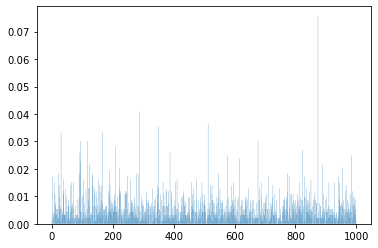

In [190]:
# airplane features
test_keys3 = []
test_vals3 = []
for key in test_hists['plane'].keys():
    test_keys3.append(key)
    val = test_hists['plane'][key] / len(test_hists['plane'].keys())
    test_vals3.append(val)
plt.bar(test_keys3, test_vals3, snap=False)